# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [147]:
# Load dataset from previous task
df = pd.read_csv('./[Klasifikasi]_Ship_Performance_Dataset.csv')
df.head()

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,cluster
0,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372,2
1,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244,0
2,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698,3
3,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581,2
4,Fish Carrier,Long-haul,Heavy Fuel Oil (HFO),Fair,18.616196,2171.646567,723.304215,14.916320,Rough,1912.509751,184569.045384,776698.354849,47.476155,1.370206,1.437725,7,53.174898,1


In [148]:
# Separate the dataset into based on the numerical and categorical features
object_df = df.select_dtypes(include='object').columns.tolist()
numeric_df = df.select_dtypes(exclude='object').columns.tolist()[:-1]

In [149]:
# Encode the categorical features
df_encoded = df.copy()
for col in object_df:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    
df_encoded.head()

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,cluster
0,2,2,2,2,10.387580,1796.057415,1060.486382,14.653083,2,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372,2
1,1,1,0,1,20.749747,1648.556685,658.874144,7.199261,1,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244,0
2,0,3,2,1,21.055102,915.261795,1126.822519,11.789063,1,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698,3
3,2,3,0,1,13.742777,1089.721803,1445.281159,9.727833,1,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581,2
4,2,1,1,1,18.616196,2171.646567,723.304215,14.916320,2,1912.509751,184569.045384,776698.354849,47.476155,1.370206,1.437725,7,53.174898,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [150]:
# Separate the dataset into features and target
X = df_encoded.drop('cluster', axis=1)
y = df_encoded['cluster']

# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [151]:
# Scaling the numerical features without involving the encoded categorical features
scaler = MinMaxScaler()
X_train_clean = X_train.copy()
X_test_clean = X_test.copy()

X_train_scaled_numeric = scaler.fit_transform(X_train[numeric_df])
X_test_scaled_numeric = scaler.transform(X_test[numeric_df])

X_train_scaled_numeric_df = pd.DataFrame(X_train_scaled_numeric, columns=numeric_df)
X_test_scaled_numeric_df = pd.DataFrame(X_test_scaled_numeric, columns=numeric_df)

for i in X_train_scaled_numeric_df.columns:
    X_train_clean[i] = X_train_scaled_numeric_df[i].values
    X_test_clean[i] = X_test_scaled_numeric_df[i].values


In [152]:
# Check all train data is clean
X_train_clean.isna().sum().sum(), X_test_clean.isna().sum().sum()

(np.int64(0), np.int64(0))

In [153]:
# Simple check the distribution of the target in the training and testing set
y_train.value_counts(), y_test.value_counts()

(cluster
 0    449
 1    432
 3    411
 2    409
 Name: count, dtype: int64,
 cluster
 0    112
 1    108
 3    103
 2    103
 Name: count, dtype: int64)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

### K-Nearest Neighbours

In [155]:
knn = KNeighborsClassifier()
knn.fit(X_train_clean, y_train)

KNeighborsClassifier()

### Decision Tree Model

In [154]:
dt = DecisionTreeClassifier()
dt.fit(X_train_clean, y_train)

DecisionTreeClassifier()

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

In this project, there are 2 machine learning algorthms was being used.

1. K-Nearest Neighbours : Simple and easy-to-use machine learning algoritm. Become the simple baseline model
2. Decision Tree : Widely used in machine learning and data analysis. Easy to understand and interpret the shape of the tree

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [ ]:
# Code the visualization function
def check_metrics(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print(f"{model.__class__.__name__} Accuracy Score:")
    print(f"Train : {accuracy_score(y_train, y_pred_train)*100:.2f}% | Test : {accuracy_score(y_test, y_pred_test)*100:.2f}%")
    print(f"{model.__class__.__name__} Macro Precision Score:")
    print(f"Train : {precision_score(y_train, y_pred_train, average='macro'):.2f} | Test : {precision_score(y_test, y_pred_test, average='macro'):.2f}")
    print(f"{model.__class__.__name__} Macro Recall Score:")
    print(f"Train : {recall_score(y_train, y_pred_train, average='macro'):.2f} | Test : {recall_score(y_test, y_pred_test, average='macro'):.2f}")
    print(f"{model.__class__.__name__} Macro F1 Score:")
    print(f"Train : {f1_score(y_train, y_pred_train, average='macro'):.2f} | Test : {f1_score(y_test, y_pred_test, average='macro'):.2f}")
    print(f"{model.__class__.__name__} Confusion Matrix:")
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='d')
    plt.title('Train Data Confusion Matrix')
    plt.subplot(1, 2, 2)
    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d')
    plt.title('Test Data Confusion Matrix')
    plt.tight_layout()
    plt.show()

KNeighborsClassifier Accuracy Score:
Train : 99.65% | Test : 99.30%
KNeighborsClassifier Macro Precision Score:
Train : 1.00 | Test : 0.99
KNeighborsClassifier Macro Recall Score:
Train : 1.00 | Test : 0.99
KNeighborsClassifier Macro F1 Score:
Train : 1.00 | Test : 0.99
KNeighborsClassifier Confusion Matrix:


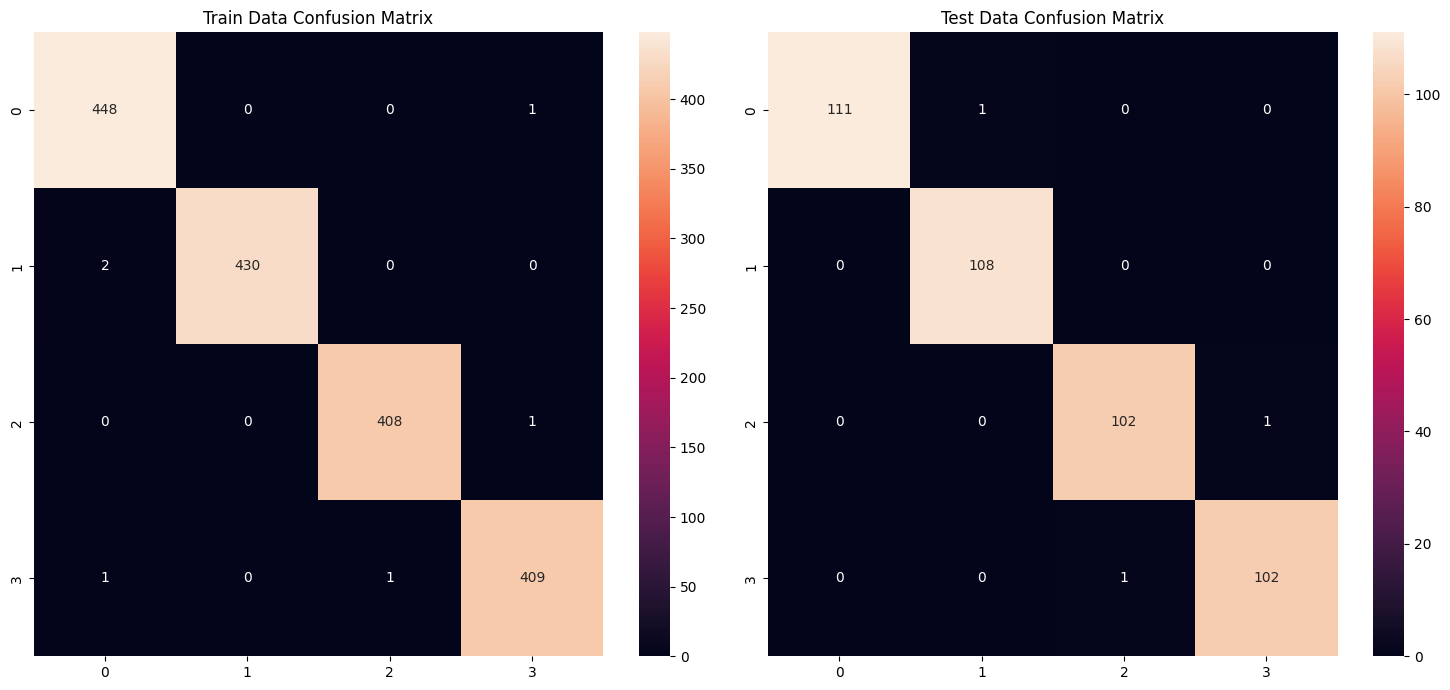

In [159]:
# KNN model evaluation
check_metrics(knn, X_train_clean, y_train, X_test_clean, y_test)

DecisionTreeClassifier Accuracy Score:
Train : 100.00% | Test : 100.00%
DecisionTreeClassifier Macro Precision Score:
Train : 1.00 | Test : 1.00
DecisionTreeClassifier Macro Recall Score:
Train : 1.00 | Test : 1.00
DecisionTreeClassifier Macro F1 Score:
Train : 1.00 | Test : 1.00
DecisionTreeClassifier Confusion Matrix:


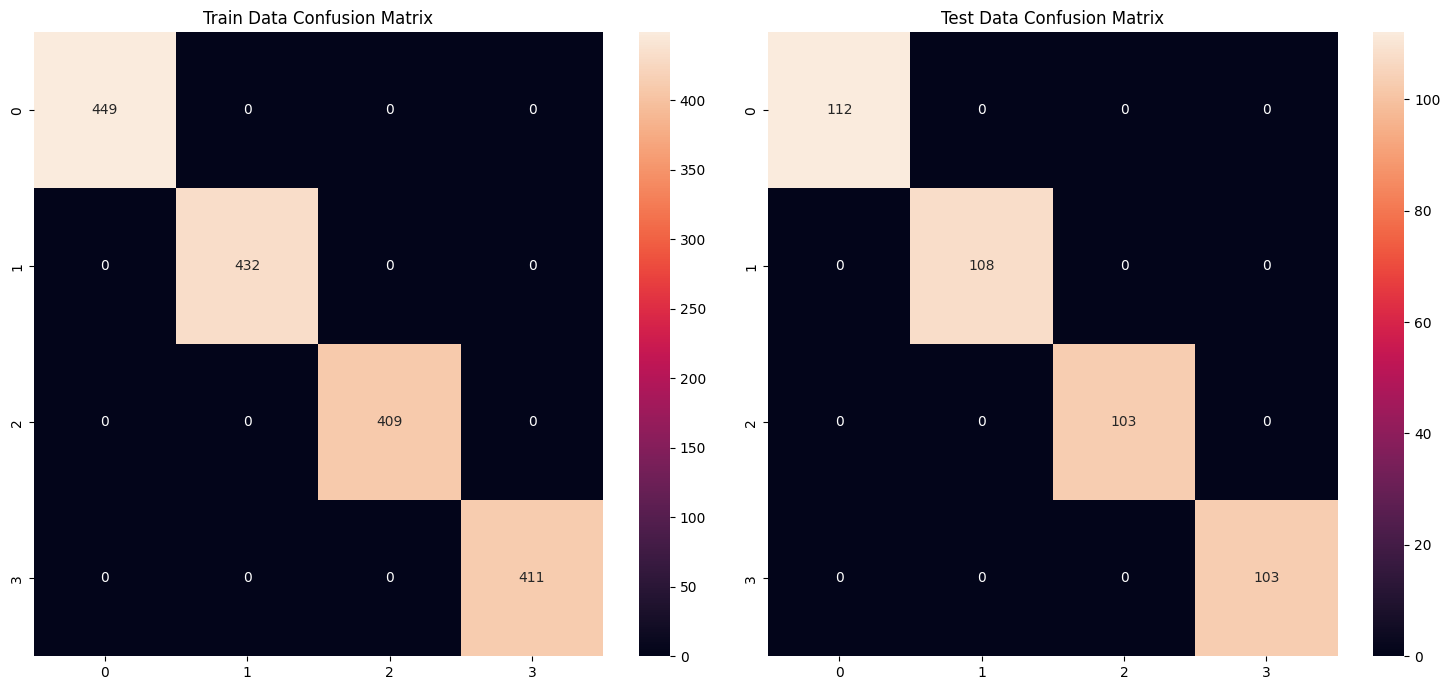

In [158]:
# Decision Tree model evaluation
check_metrics(dt, X_train_clean, y_train, X_test_clean, y_test)

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

1. As the baseline model, KNN achieves **near perfect** results across train and test dataset.
2. However, Decision Tree achieves a **PERFECT** metrics across train and test dataset.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [161]:
#Type your code here
# No need tuning, because the dataset is already clean and the model result are already satisfying

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [162]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

### Model Result Analysis

Cited from [kaggle](https://www.kaggle.com/datasets/jeleeladekunlefijabi/ship-performance-clustering-dataset/data), as this dataset's author said that :

The Ship Performance Dataset is a <u>synthetic yet realistic</u> collection of data designed to represent key operational metrics and attributes of various ship types in the Gulf of Guinea.

It is understandable the model results in a magnificent score across several metrics. However, even though the data is synthetic, if the initial processing result (since the first clustering task) is not handled carefully, the final result still might not be optimized.

Ekhmm, by the way, as mentioned earlier, KNN as model baseline has already resulted in a near-perfect score. Tried using another algorithm, which is Decision Tree, it apparently resulted in a PERFECT sore. Is this model overfitting? I think **NO**. As you can see from the metrics above, both the model's train accuracy and test accuracy have same high result. Those confusion metrices also show a nice diagonal True Positive results. It indicates these models are fit perfectly!

Since this model was trained using <u>synthetic yet realistic</u> dataset, it would be better to try this model in a **fully realistic** scenario for future works!